Import standard modules:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, Image
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [5]:
HTML('../style/code_toggle.html')

***

## Polarization and Antenna Feeds (C- and D-Jones)

The antenna feed, like the primary beam, has a complex time, frequency, and direction response depending on its design. The receptor converts EM waves to a current. Optimizing for parameters such as gain, bandwidth, polarization leakage, impedance matching, and the smoothness lead to different feed designs. A *$\lambda/4$ (quarter-wavelength) dipole*, a classical design, is a simple dipole made up of two monopoles of length $\lambda/4$ connected to a *balun*, which is an electronic device which converts an EM signal to a current. This design is very broad spatially, close to isotropic, with a peak sensitivity at $\lambda$ with a smooth roll-off to other frequencies, but is not broadband or directive. Other feeds, such as log-periodic dipoles, Vivaldi, horns, etc. are optimized for different parameters depending on their use. Many lifetimes - and resulting books - have been dedicated to the topic of antenna feed design.

### 1 Representing Polarized Light with Jones Vectors

Any state of polarization can be described using a two-element *Jones vector*. Consider a light ray, with an instantanous vector as shown:

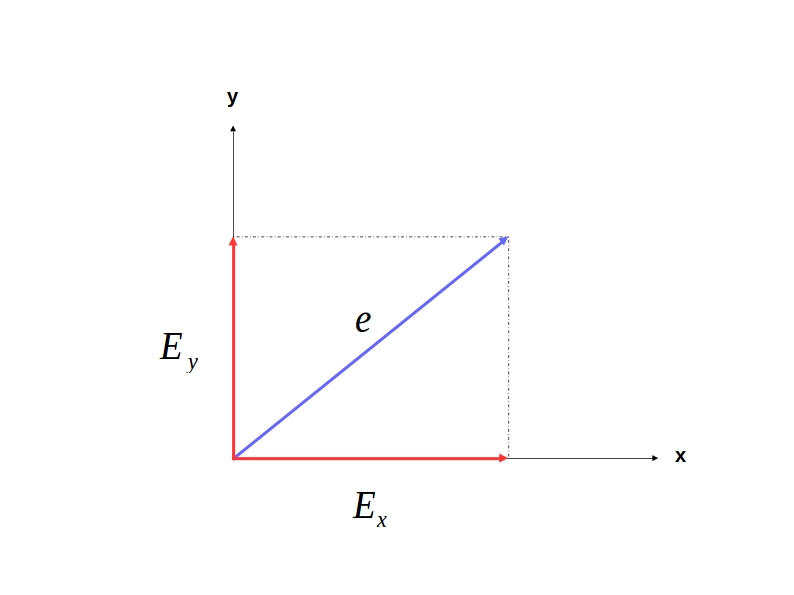

In [6]:
Image(filename="linear.jpg")

**Figure 1**: Geometric representation of a complex number <a id='instrum:fig:linear'></a>

The $2\times 1$ Jones vector is equal to
\begin{equation}
{\bf{e}} = \begin{bmatrix}E_x\\E_y \end{bmatrix} = \begin{bmatrix} E_{0x}e^{\imath \phi_x}\\ E_{0y}e^{\imath \phi_y}\end{bmatrix},
\end{equation}

where $E_x$ and $E_y$ are the amplitudes and $\phi_x$ and $\phi_y$ are the respective phases.

Linearly polarized light can be said to be horizontally, vertically or diagonally (linearly at an angle) polarized.

**Horizontally polarized light**

Suppose the electric field is oscillating along the $x$-axis. The Jones vector can then be written as:
\begin{equation}
{\bf{e}} = \begin{bmatrix} E_x\\E_y\end{bmatrix} = \begin{bmatrix} E_{0x}e^{\imath \phi_x}\\ E_{0y}e^{\imath \phi_y}\end{bmatrix} = A\begin{bmatrix} 1\\0\end{bmatrix}
\end{equation}

**Vertically polarized light**

Suppose the electric field is oscillating along the $y$-axis. The Jones vector can then be written as:
\begin{equation}
{\bf{e}} = \begin{bmatrix} E_x\\E_y\end{bmatrix} = \begin{bmatrix} E_{0x}e^{\imath \phi_x}\\ E_{0y}e^{\imath \phi_y}\end{bmatrix} = A\begin{bmatrix} 0\\1\end{bmatrix}
\end{equation}

**Linearly polarized light at an angle**

Consider phases such that $\phi=m\pi$, $m=0,\pm1,2,...$. 
Then, 
\begin{equation}
\frac{E_x}{E_y} = (-1)^m\frac{E_{0x}}{E_{0y}}
\end{equation}

and we get an *angle of inclination*: $\phi = tan^{-1}\Big( \frac{E_{0y}}{E_{0x}}\Big)$.

The Jones vector is then given by
\begin{equation}
{\bf{e}} = \begin{bmatrix} E_x\\E_y\end{bmatrix} =A(-1)^m\begin{bmatrix}cos\phi\\ sin \phi \end{bmatrix}
\end{equation}

**Circular polarized light**

If $E_x$ is leading $E_y$ by $\frac{\pi}{2}$ (Left hand polarization), then the Jones vector is given by
\begin{equation}
{\bf{e}} = \begin{bmatrix} E_x\\E_y\end{bmatrix}=\begin{bmatrix} E_{0x}e^{\imath \phi_x}\\ E_{0y}e^{\imath \phi_y}\end{bmatrix} 
=A(-1)^m\begin{bmatrix}A\\Ae^{\imath \frac{\pi}{2}}\end{bmatrix}=A\begin{bmatrix} 1\\\imath\end{bmatrix}.
\end{equation}

If $E_x$ is leading $E_y$ by $-\frac{\pi}{2}$ (Right hand polarization), then the Jones vector is given by
\begin{equation}
{\bf{e}} = \begin{bmatrix} E_x\\E_y\end{bmatrix}=\begin{bmatrix} E_{0x}e^{\imath \phi_x}\\ E_{0y}e^{\imath \phi_y}\end{bmatrix} 
=A(-1)^m\begin{bmatrix}A\\Ae^{-\imath \frac{\pi}{2}}{2}\end{bmatrix}=A\begin{bmatrix} 1\\-\imath\end{bmatrix}
\end{equation}

### 2 Representing Polarizers with Jones Matrices

Consider an incident beam of light denoted by the Jones vector

\begin{equation}
{\bf{e}}_i = \begin{bmatrix} E_{ix}\\E_{iy}\end{bmatrix}.
\end{equation}

The light will interact with the device, and the new polarization state can be represented as 
\begin{equation}
{\bf{e}}_t = \begin{bmatrix} E_{tx}\\E_{ty}\end{bmatrix}.
\end{equation}

The coupling of these two vectors can be described by the following pair of linear equations:
\begin{align}
E_{tx} &= j_{11}E_{ix} + j_{12}E_{iy}\\
E_{ty} & = j_{21}E_{ix} + j_{22}E_{iy}
\end{align}

The two equation can be represented in matrix notation as follows:
\begin{equation}
{\bf{e}}_t = {\bf{J}}{\bf{e}}_i,
\end{equation}

where ${\bf{J}} = \begin{bmatrix}j_{11}&j_{12}\\j_{21}&j_{22}\end{bmatrix}$.

**Jones matrices for some common polarizers**

* Vertical Linear Polarizer: ${\bf{J}} = \begin{bmatrix}0&0\\0&1\ \end{bmatrix}$

* Horizontal Linear Polarizer: ${\bf{J}} = \begin{bmatrix} 1&0\\0&0\end{bmatrix}$

* Linear Polarizer at $45^{\circ}$: ${\bf{J}} =\frac{1}{2} \begin{bmatrix} 1&1\\1&1\end{bmatrix}$

* Right Circular Polarizer: ${\bf{J}} =\frac{1}{2} \begin{bmatrix} 1&\imath\\-\imath&1\end{bmatrix}$

* Right Circular Polarizer: ${\bf{J}} =\frac{1}{2} \begin{bmatrix} 1&-\imath\\-\imath&1\end{bmatrix}$

In radio astronomy, the correlated voltages or visibilities recorded by antennas $p$ and $q$ of a radio interferometer are given by
\begin{equation}
{\bf{V}}_{pq} = \sum_{i=1}^k {\bf{J}}_{pi}{\bf{C}}_i{\bf{J}}_{qi}^H + {\bf{N}}_{pq},
\end{equation}
where the coherency matrix ${\bf{C}}_i={\bf{e}}_i\otimes{\bf{e}}_i^H$ and ${\bf{N}}_{pq}$ is the noise. The visibilities can be rewritten in a vectorized form using equalities defined in 2.10.2 such that
\begin{equation}
{\bf{v}}_{pq} = \text{vec}({\bf{V}}_{pq}) = \sum^k_{i=1}{\bf{J}}_{qi}^H\otimes {\bf{J}}_{pi}\text{vec}({\bf{C}}_i) + {\bf{n}}_{pq}.
\end{equation}

### 3 Stokes Parameters 

Let us consider a plane monochromatic wave of frequency $\nu$, propagating along the line of sight (z-axis of a cartesain coordinate system).  As discussed in earlier, since electromagnetic waves are transverse, the electric field lies in the $x-y$ plane and is given by
\begin{equation}
{\bf{e}} = \begin{bmatrix}
e_xcos(2\pi\nu t)\\
e_ycos(2\pi\nu t +\delta)
\end{bmatrix}.
\end{equation}

The $x$ and $y$ components differ by a time-independent phase factor $\delta$. If $\delta=0$, then the waves are said to be linearly polarized. When $e_x=e_y$ and $\delta=\pm \frac{\pi}{2}$, the wave is said to be either left circular polarized (anticlockwise direction) or right circular polarized (clockwise direction).

In radio astronomy, the  radio interferometer measures the Fourier transform of the signal, i.e a correlation function of the field that has the units of voltage squared. Hence, the polarization properties of an incoming signal is usually denoted using *Stokes* parameters. 

The Stokes parameters for linear feeds (or linear polarization) are defined as

\begin{align}
I &= \langle e_x e_x^* \rangle + \langle e_y e_y^* \rangle\\
Q &= \langle e_x e_x^* \rangle - \langle e_y e_y^* \rangle\\
U &= 2\text{Re}\langle e_x e_y^* \rangle \\
V &= 2\text{Im}\langle e_x e_x^* \rangle.
\end{align}

or

\begin{align}
\langle e_xe_x^*\rangle &= I+Q\\
\langle e_ye_y^*\rangle &= I-Q\\
\langle e_xe_y^*\rangle &= U+iV\\
\langle e_x^*e_y\rangle &= U-iV
\end{align}

where the angle brackets represent the average value.

Given that the electric field is composed of two circular feeds, left, $e_l$, and right, $e_r$, the Stokes parameters are defined as

\begin{align}
I &= \langle e_r e_r^* \rangle + \langle e_l e_l^* \rangle\\
Q &= \langle e_r e_l^* \rangle + \langle e_r^* e_l \rangle\\
U &= \text{Im}\big(\langle e_r e_l^* \rangle - \langle e_r^* e_l
\rangle\big)\\
V &= \langle e_re_r^*\rangle - \langle e_le_l^*\rangle
\end{align}

or

\begin{align}
\langle e_re_r^*\rangle &= I+V\\
\langle e_le_l^*\rangle &= I-V\\
\langle e_re_l^*\rangle &= Q+iU\\
\langle e_r^*e_l\rangle &= Q-iU.
\end{align}

The degree of polarization is given by
\begin{equation}
P=\frac{\sqrt(Q^2+U^2+V^2)}{I}.
\end{equation}

From the definition of Stokes parameters for linear feeds, we have,
\begin{equation}
I^2-Q^2-U^2-V^2 = \big(\langle e_x^2\rangle \langle e_y^2\rangle -\langle e_xe_y\rangle^2\big).
\end{equation}

If $P=1$, then $I^2=Q^2+U^2+V^2$ and the wave is said to be *fully polarized*. If $P<1$, then the wave is *partially polarized*.

### 4 Mueller Matrices

A polarized beam propagates through one or more polarizing elements, which results in a new polarized beam as shown below:

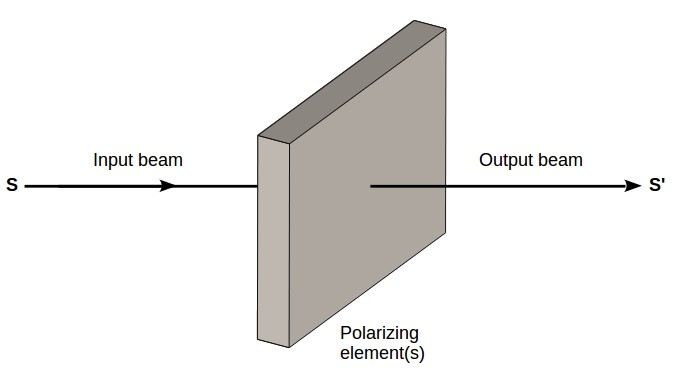

In [7]:
Image(filename="linear_2.jpg")

**Figure 2**: Polarisation of the beam by one element <a id='instrum:fig:linear2'></a>

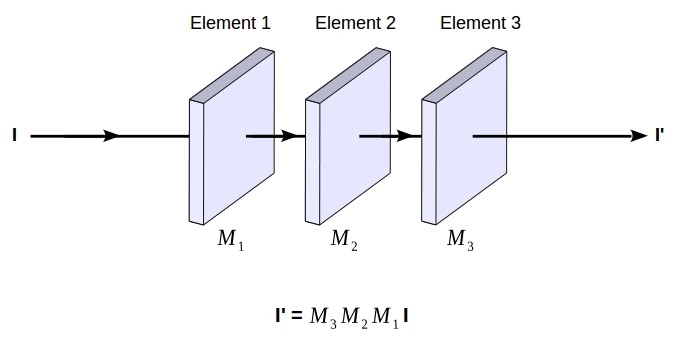

In [8]:
Image(filename="linear_3.jpg")

**Figure 3**: Net beam polarisation caused by multiple elements <a id='instrum:fig:linear3'></a>

The input light ray or beam is generally denoted by a Stokes brightness vector ${\bf{s}}$, and the output beam by ${\bf{B}}'$. ${\bf{B}}'$ is linearly related to ${\bf{s}}$ by $4\times 4$ matrix such that

\begin{align}
{\bf{s}}^{'}&={\bf{M}}.{\bf{s}}\\
\begin{bmatrix} S_0^{'}\\S_1^{'}\\S_2^{'}\\S_3^{'}\end{bmatrix}&=
\begin{bmatrix}m_{00}&m_{01}&m_{02}&m_{03}\\m_{10}&m_{11}&m_{12}&m_{13}\\m_{20}&m_{21}&m_{22}&m_{23}\\m_{20}&m_{21}&m_{22}&m_{23}\end{bmatrix}
\begin{bmatrix} S_0\\S_1\\S_2\\S_3\end{bmatrix}.
\end{align}

From the vectorized visibility equation in section 2.10.4, ${\bf{M}}$ is given by ${\bf{J}} \otimes {\bf{J}}^H$
\begin{align}
{\bf{J}} \otimes {\bf{J}}^H  &= 
\begin{bmatrix}
J_{00} & J_{01} & J_{02} & J_{03} \\
J_{10} & J_{11} & J_{12} & J_{13} \\
J_{00} & J_{21} & J_{22} & J_{23} \\
J_{00} & J_{31} & J_{32} & J_{33} 
\end{bmatrix}\otimes
\begin{bmatrix}
J_{00}^* & J_{10}^* & J_{20}^* & J_{30}^* \\
J_{01}^* & J_{11}^* & J_{21}^* & J_{31}^* \\
J_{02}^* & J_{12}^* & J_{22}^* & J_{32}^* \\
J_{03}^* & J_{13}^* & J_{23}^* & J_{33}^* 
\end{bmatrix} 
\\
& = \begin{bmatrix}
J_{00} J_{00}^*& J_{01}J_{10}^* & J_{02}J_{20}^* & J_{03}J_{30}^*\\
J_{10} J_{01}^*& J_{11}J_{11}^* & J_{12}J_{21}^* & J_{13}J_{31}^*\\
J_{20} J_{02}^*& J_{21}J_{12}^* & J_{22}J_{22}^* & J_{23}J_{32}^*\\
J_{30} J_{03}^*& J_{31}J_{13}^* & J_{32}J_{23}^* & J_{33}J_{33}^*
\end{bmatrix}.
\end{align}

### 5 Coherency Matrix

Finally, we will develop a mathematical formulation for polarimetric interferometry, i.e we will reconstruct the Radio Interferometric Measurement equation (RIME). We assume that our instrument is a two-element interferometer with two antennas, $p$ and $q$. Each antenna has two feeds, $a$ and $b$. The coherency vector measured by baseline $pq$ is then given by:
\begin{equation}
\begin{bmatrix}
\langle e_{ap}e_{bp}^*\rangle\\
\langle e_{ap}e_{bq}^*\rangle\\
\langle e_{aq}e_{bp}^*\rangle\\
\langle e_{aq}e_{bq}^*\rangle
\end{bmatrix} = \Bigg \langle \begin{bmatrix} e_{ap}\\e_{aq}\end{bmatrix}\otimes \begin{bmatrix} e_{bp}^*\\e_{bq}^*\end{bmatrix} \Bigg \rangle
\end{equation}

We then multiply the Stokes vector by the Stokes matrix, ${\bf{S}}$. The Stokes matrix depends on our choice of polarized coordinate systems. In a linear system, the Stokes vector is equal to
\begin{equation}
\begin{bmatrix}I\\Q\\U\\V\end{bmatrix} = \frac{1}{2}\begin{bmatrix}
1&0&0&1\\1&0&0&-1\\0&1&1&0\\0&-i&i&0\end{bmatrix}\begin{bmatrix}
\langle e_{ax}e_{bx}^*\rangle\\
\langle e_{ax}e_{by}^*\rangle\\
\langle e_{ay}e_{bx}^*\rangle\\
\langle e_{ay}e_{by}^*\rangle\end{bmatrix}.
\end{equation}

In the case of circular polarization, the Stokes components are
\begin{equation}
\begin{bmatrix}I\\Q\\U\\V\end{bmatrix} = \frac{1}{2}\begin{bmatrix}
1&0&0&1\\0&1&1&0\\0&-i&i&0\\1&0&0&-1\end{bmatrix}\begin{bmatrix}
\langle e_{ar}e_{br}^*\rangle\\
\langle e_{ar}e_{bl}^*\rangle\\
\langle e_{al}e_{br}^*\rangle\\
\langle e_{al}e_{bl}^*\rangle\end{bmatrix}.
\end{equation}